In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
import pathlib
data_root = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                    fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root)
print(data_root)

228818944/228813984 [==============================] - 35s 0us/step
C:\Users\Duongkx\.keras\datasets\flower_photos


In [4]:
for item in data_root.iterdir():
  print(item)

C:\Users\Duongkx\.keras\datasets\flower_photos\daisy
C:\Users\Duongkx\.keras\datasets\flower_photos\dandelion
C:\Users\Duongkx\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\Duongkx\.keras\datasets\flower_photos\roses
C:\Users\Duongkx\.keras\datasets\flower_photos\sunflowers
C:\Users\Duongkx\.keras\datasets\flower_photos\tulips


In [5]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [6]:
all_image_paths[:10]

['C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\roses\\4998708839_c53ee536a8_n.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\dandelion\\5110103388_78dc02558e_n.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\daisy\\5608389827_a42a46f760.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\daisy\\3962240986_0661edc43a_n.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\tulips\\14487705209_ea723109e1_m.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\dandelion\\8684108_a85764b22d_n.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\dandelion\\4654848357_9549351e0b_n.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\roses\\18584002386_cec0df537d_n.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\tulips\\6989946990_62c639ff16_n.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\dandelion\\20165867412_fc45d31698_m.jpg']

In [10]:
import os
attributions = (data_root/"LICENSE.txt").read_text(encoding="utf8").splitlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [44]:
import IPython.display as display

def caption_image(image_path):
    image_rel = str(pathlib.Path(image_path).relative_to(data_root))
    image_rel=image_rel.replace("\\", "/")
    return "Image (CC BY 2.0) " + ' - '.join(attributions[image_rel].split(' - ')[:-1])

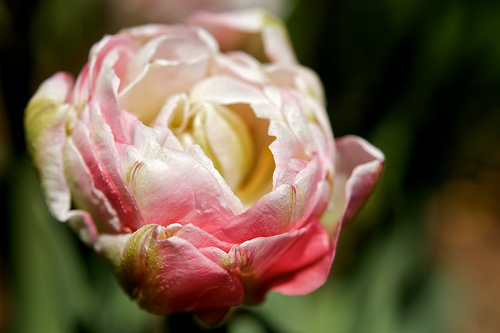

Image (CC BY 2.0)  by bark



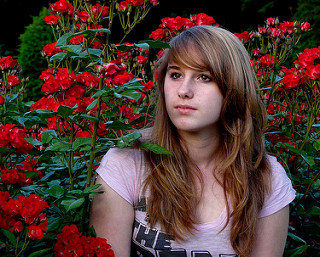

Image (CC BY 2.0)  by Eddy Van 3000



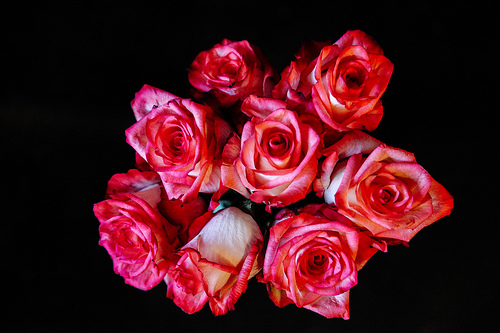

Image (CC BY 2.0)  by Sonny Abesamis



In [45]:
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))
  print()

In [46]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [47]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [48]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [2, 1, 0, 0, 4, 1, 1, 2, 4, 1]


In [49]:
img_path = all_image_paths[0]
img_path

'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\roses\\4998708839_c53ee536a8_n.jpg'

In [50]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


In [51]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(240, 320, 3)
<dtype: 'uint8'>


In [52]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


In [53]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [54]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

In [55]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

In [56]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [57]:
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [58]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

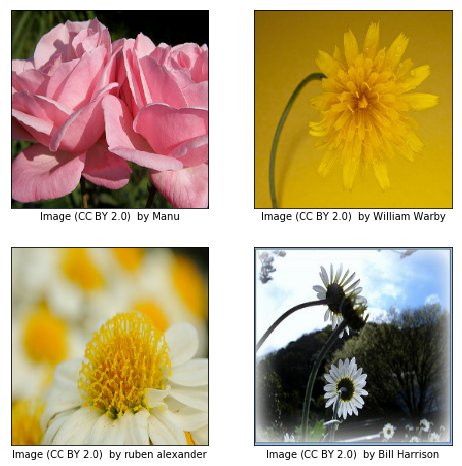

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(caption_image(all_image_paths[n]))

In [60]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [61]:
for label in label_ds.take(10):
  print(label_names[label.numpy()])

roses
dandelion
daisy
daisy
tulips
dandelion
dandelion
roses
tulips
dandelion


In [62]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [63]:
print(image_label_ds)

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


In [64]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [65]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [66]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

9412608/9406464 [==============================] - 11s 1us/step


In [77]:
def change_range(image,label):
  return 2*image-1, label

keras_ds = ds.map(change_range)

In [78]:
# The dataset may take a few seconds to start, as it fills its shuffle buffer.
image_batch, label_batch = next(iter(keras_ds))

In [79]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 6, 6, 1280)


In [80]:
model = tf.keras.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(len(label_names))])

In [81]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: -2.8485026
max logit: 1.8096514

Shape: (32, 5)


In [82]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [83]:
len(model.trainable_variables) 

2

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [85]:
steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

115.0

In [86]:
model.fit(ds, epochs=1, steps_per_epoch=3)

3/3 [==============================] - 10s 3s/step - loss: 8.4770 - accuracy: 0.2396


In [87]:
import time
default_timeit_steps = 2*steps_per_epoch+1

def timeit(ds, steps=default_timeit_steps):
  overall_start = time.time()
  # Fetch a single batch to prime the pipeline (fill the shuffle buffer),
  # before starting the timer
  it = iter(ds.take(steps+1))
  next(it)

  start = time.time()
  for i,(images,labels) in enumerate(it):
    if i%10 == 0:
      print('.',end='')
  print()
  end = time.time()

  duration = end-start
  print("{} batches: {} s".format(steps, duration))
  print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))
  print("Total time: {}s".format(end-overall_start))

In [88]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [89]:
timeit(ds)

........................
231.0 batches: 7.732318878173828 s
955.98747 Images/s
Total time: 10.944725275039673s


In [90]:
ds = image_label_ds.cache()
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [91]:
timeit(ds)

........................
231.0 batches: 1.6525795459747314 s
4473.00707 Images/s
Total time: 4.741286277770996s


In [92]:
timeit(ds)

........................
231.0 batches: 1.5678069591522217 s
4714.86617 Images/s
Total time: 4.6914520263671875s


In [93]:
ds = image_label_ds.cache(filename='./cache.tf-data')
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(1)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [94]:
timeit(ds)

........................
231.0 batches: 13.621126174926758 s
542.68641 Images/s
Total time: 20.81830906867981s


In [95]:
timeit(ds)

........................
231.0 batches: 13.541966676712036 s
545.85868 Images/s
Total time: 18.30105972290039s


In [96]:
timeit(ds)

........................
231.0 batches: 13.429171562194824 s
550.44349 Images/s
Total time: 17.81011939048767s


In [97]:
image_ds = tf.data.Dataset.from_tensor_slices(all_image_paths).map(tf.io.read_file)
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(image_ds)

In [98]:
image_ds = tf.data.TFRecordDataset('images.tfrec').map(preprocess_image)

In [99]:
ds = tf.data.Dataset.zip((image_ds, label_ds))
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [100]:
timeit(ds)

........................
231.0 batches: 13.422070980072021 s
550.73468 Images/s
Total time: 19.40409255027771s


In [101]:
paths_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = paths_ds.map(load_and_preprocess_image)
image_ds

<MapDataset shapes: (192, 192, 3), types: tf.float32>

In [102]:
ds = image_ds.map(tf.io.serialize_tensor)
ds

<MapDataset shapes: (), types: tf.string>

In [103]:
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(ds)

In [104]:
ds = tf.data.TFRecordDataset('images.tfrec')

def parse(x):
  result = tf.io.parse_tensor(x, out_type=tf.float32)
  result = tf.reshape(result, [192, 192, 3])
  return result

ds = ds.map(parse, num_parallel_calls=AUTOTUNE)
ds

<ParallelMapDataset shapes: (192, 192, 3), types: tf.float32>

In [105]:
ds = tf.data.Dataset.zip((ds, label_ds))
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [106]:
timeit(ds)

........................
231.0 batches: 13.612619638442993 s
543.02553 Images/s
Total time: 17.793945789337158s
